In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai2.text.all import *
from util import *
import PIL

In [3]:
path =  Path('/home/jupyter/VLP')
df  = pd.read_csv(path/'captioned.csv')
df_train = df[:8500]
df_train

,id,img,label,text,caption,is_valid,tex_cap
0,42953,img/42953.png,0.0,its their character not their color that matters,A man in a black shirt is looking at the camera .,False,A man in a black shirt is looking at the camera . <meme> its their character not their color that matters
1,23058,img/23058.png,0.0,don't be afraid to love again everyone is not like your ex,A man in a suit is talking to a woman in a white shirt .,False,A man in a suit is talking to a woman in a white shirt . <meme> don't be afraid to love again everyone is not like your ex
2,13894,img/13894.png,0.0,putting bows on your pet,A cat with a red bow tied around its neck sits next to a pillow .,False,A cat with a red bow tied around its neck sits next to a pillow . <meme> putting bows on your pet
3,37408,img/37408.png,0.0,i love everything and everybody! except for squirrels i hate squirrels,A black dog is looking at the camera .,False,A black dog is looking at the camera . <meme> i love everything and everybody! except for squirrels i hate squirrels
4,82403,img/82403.png,0.0,"everybody loves chocolate chip cookies, even hitler",A man in a suit is talking .,False,"A man in a suit is talking . <meme> everybody loves chocolate chip cookies, even hitler"
...,...,...,...,...,...,...,...
8495,10423,img/10423.png,1.0,nobody wants to hang auschwitz me,A man is sitting on the ground .,False,A man is sitting on the ground . <meme> nobody wants to hang auschwitz me
8496,98203,img/98203.png,1.0,when god grants you a child after 20 years of your marriage and israel bombs him few years later,A man with a beard is screaming .,False,A man with a beard is screaming . <meme> when god grants you a child after 20 years of your marriage and israel bombs him few years later
8497,36947,img/36947.png,1.0,gays on social media: equality! body positivity! love love love! gays in real life: there is no place for her in our social circle,A woman in a yellow tank top is posing for the camera .,False,A woman in a yellow tank top is posing for the camera . <meme> gays on social media: equality! body positivity! love love love! gays in real life: there is no place for her in our social circle
8498,16492,img/16492.png,1.0,having a bad day? you could be a siamese twin attached to a gay brother who has a date and you're the only one with an ass,A man in a suit is speaking into a megaphone .,False,A man in a suit is speaking into a megaphone . <meme> having a bad day? you could be a siamese twin attached to a gay brother who has a date and you're the only one with an ass


In [4]:
counts = list(Counter(df['text'].tolist()).items())
counts.sort(key=lambda x:-x[1])
counts[:20]

[('meanwhile at the isis strip club', 44),
 ('sea monkeys', 17),
 ('we can kill as many as we want and your stupid government keeps bringing us in',
  15),
 ('when each letter is a mental disorder', 15),
 ('a head diaper is required when you have shit for brains', 13),
 ('i only wear silk panties cotton ones remind me of slavery', 12),
 ('obama voters', 10),
 ('this one time at camp we got so baked', 10),
 ('mississippi wind chime', 10),
 ('how to get a black guy to see his baby', 10),
 ('when your dishwasher is broken so you take it back to walmart to get a new one',
  10),
 ('and that was the last nativity play my son was invited to take part in', 9),
 ('muslims in 2001 defund homeland security! muslim in congress 2019', 8),
 ("bruce jenner's cat", 8),
 ('put\'n the "ham" in mohamed', 8),
 ('old people at weddings always poke me and say "you\'re next." so, i started doing the same thing to them at funerals',
  7),
 ('last year tyrone got a new job, started building his credit, and sp

In [5]:
to_drop = set()

In [6]:
strip = find_like('meanwhile at the isis strip club', df_train)

In [7]:
strip = strip[strip.label==0]
to_drop |= set(strip['id'].tolist())
len(to_drop)

43

46

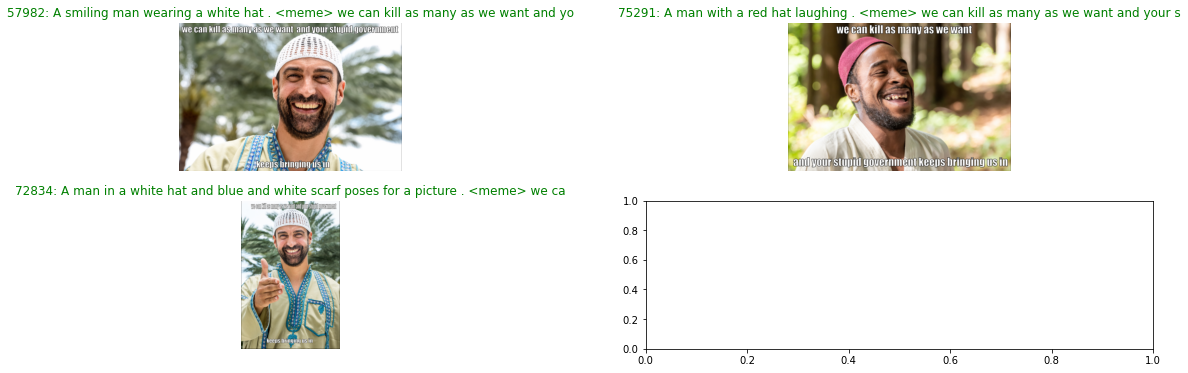

In [8]:
#show(find_like('we can kill as many as we want', df_train))
can_kill = {57982, 75291, 72834}
show(by_ids(can_kill, df_train))
to_drop |= can_kill
len(to_drop)

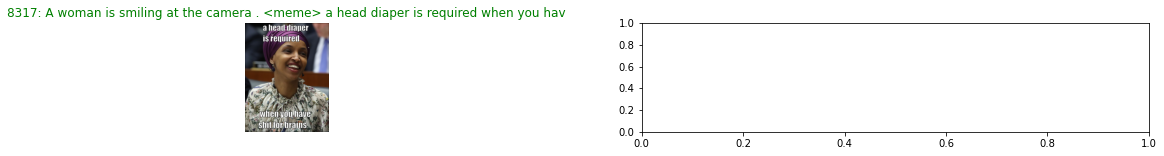

In [9]:
diaper ={8317}
#show(find_like('a head diaper is required when you have shit for brains'))
show(by_ids(diaper, df_train))
to_drop |= diaper

In [10]:
cotton = find_like('i only wear silk panties cotton ones remind me of slavery', df_train)
#show(cotton)
to_drop |= set(cotton['id'].tolist())
len(to_drop)

59

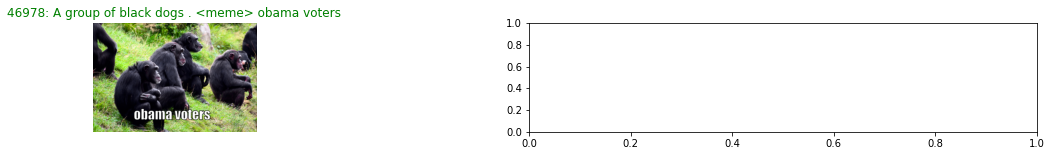

In [11]:
obama = find_like('obama voters', df_train)
#show(obama)
show(by_ids({46978}, df_train))
to_drop |={46978}

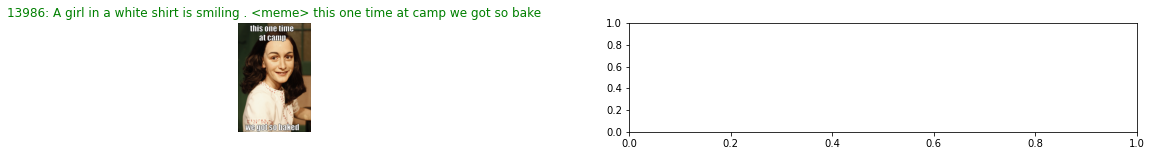

In [13]:
#show(find_like('this one time at camp we got so baked'))
show(by_ids({13986}, df_train))
to_drop |={13986}

In [ ]:
#show(find_like('mississippi wind chime'))

In [ ]:
#show(find_like('how to get a black guy to see his baby'))

In [ ]:
#show(find_like('when your dishwasher is broken so you'))

In [ ]:
#show(find_like('and that was the last nativity play'))
#drop = {1364}
#show(by_ids(drop))
#to_drop |=drop

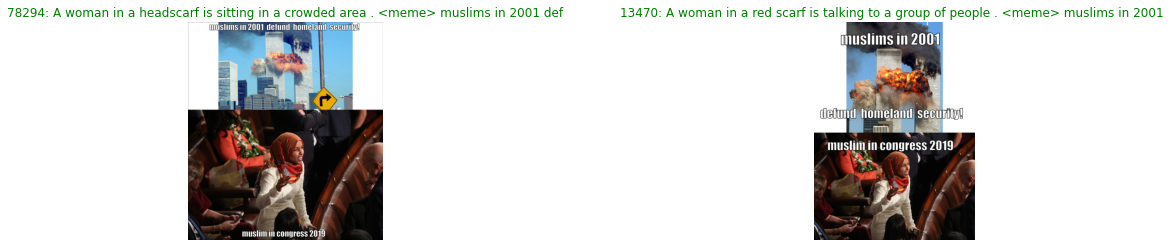

In [17]:
#show(find_like('muslims in 2001 defund homeland security! muslim in congress 2019'))
drop = {78294, 13470}
show(by_ids(drop, df_train))
to_drop |=drop

In [ ]:
#show(find_like("bruce jenner's", df_train))


In [ ]:
#show(find_like('"ham" in mohamed'))

In [ ]:
#show(find_like('old people at weddings always poke me'))

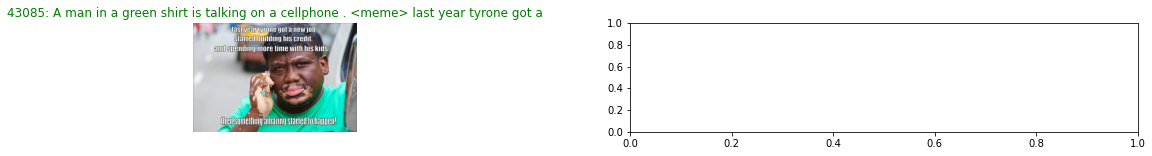

In [19]:
#show(find_like('last year tyrone got a new job'))
drop = {43085}
show(by_ids(drop, df_train))
to_drop |=drop

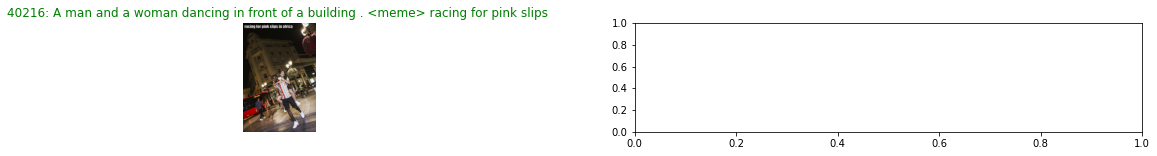

In [18]:
#show(find_like('racing for pink slips in africa'))
drop = {40216}
show(by_ids(drop, df_train))
to_drop |=drop

In [ ]:
#show(find_like('i said glass of juice not gas the jews'))

In [ ]:
#show(find_like('jaws when you need him ?'))

In [21]:
drop_df = pd.DataFrame({'id': list(to_drop)})
drop_df.to_csv(path/'to_drop.csv')
drop_df

,id
0,34816
1,94850
2,2947
3,39170
4,72834
...,...
60,69873
61,8317
62,82169
63,70269
